In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)

In [ ]:
Ustunlar:
columns

Age - yosh
Sex - jins
BP - qon bosimi
Cholesterol - qondagi xolesterol
Na_to_K - organizmdagi natriy miqdorining kaliyga nisbati

In [3]:
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
87,69,M,LOW,HIGH,15.478,drugY
140,49,M,HIGH,NORMAL,6.269,drugA
93,42,F,LOW,NORMAL,29.271,drugY
51,67,M,NORMAL,NORMAL,10.898,drugX
116,67,M,NORMAL,NORMAL,9.514,drugX
3,28,F,NORMAL,HIGH,7.798,drugX
137,35,F,HIGH,HIGH,12.894,drugA
45,66,F,NORMAL,NORMAL,8.107,drugX
121,15,M,HIGH,NORMAL,17.206,drugY
38,39,F,NORMAL,NORMAL,9.709,drugX


In [4]:
# Matnli ustunlarga ishlov beramiz
# We process text columns

encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'].values)
df['BP'] = encoder.fit_transform(df['BP'].values)
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'].values)
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
74,31,1,0,1,17.069,drugY
148,61,0,1,1,7.340,drugX
155,49,1,1,0,10.537,drugC
98,20,1,0,1,35.639,drugY
91,41,1,0,1,15.156,drugY
138,51,1,0,1,11.343,drugB
88,37,0,0,1,23.091,drugY
131,52,1,1,1,32.922,drugY
7,41,1,1,0,11.037,drugC
19,32,0,0,1,25.974,drugY


In [5]:
# x va y larni ajratib olamiz

X = df[['Age','Sex','BP','Cholesterol','Na_to_K']].values
X[0:5]

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043]])

In [6]:
y = df['Drug'].values

In [7]:
# Train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

In [8]:
# Model

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
# baholash

y_predict = tree_model.predict(X_test)

In [10]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       0.75      1.00      0.86         9
       drugX       1.00      0.81      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



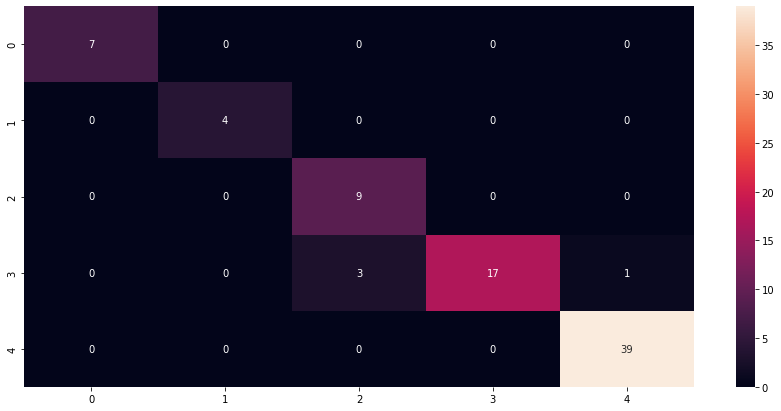

In [16]:
plt.figure(figsize=(15, 7))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [18]:
#Cross-validation

predict = cross_val_predict(estimator = tree_model, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



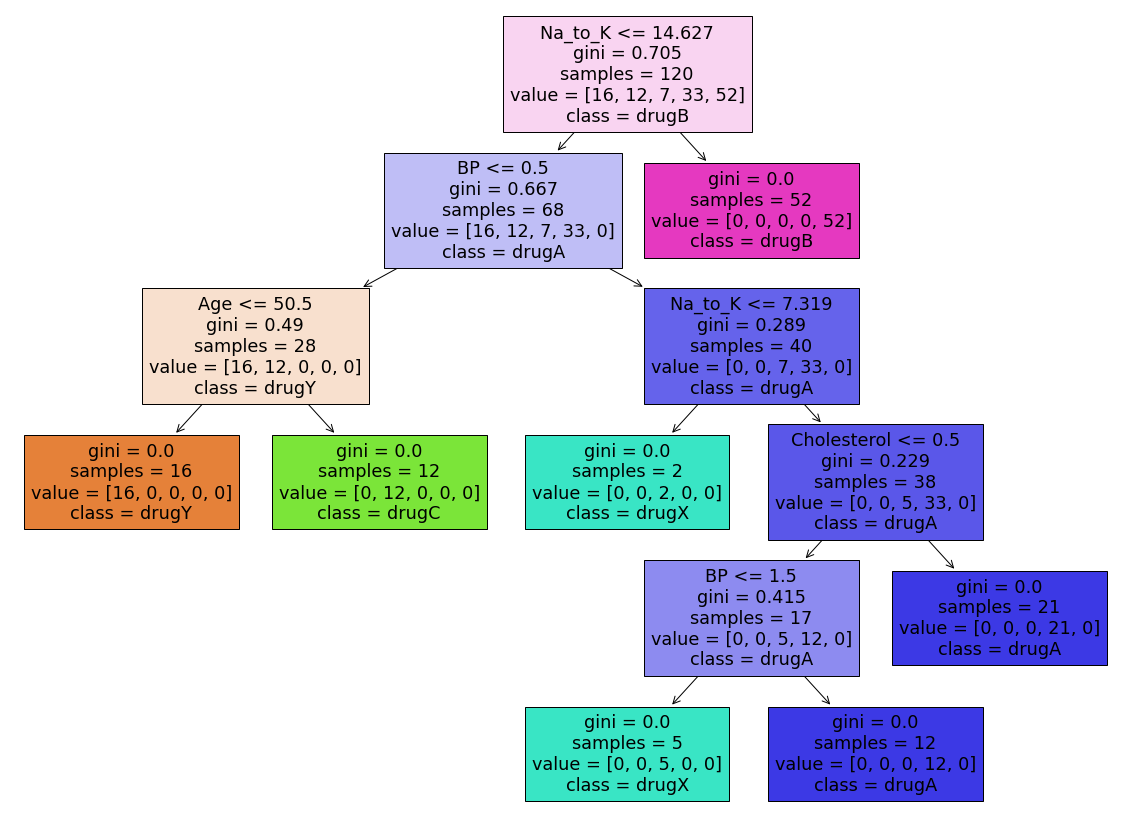

In [20]:
# Decision Tree chizamiz

cols = df.drop('Drug', axis=1).columns
classes = df['Drug'].unique()

plt.figure(figsize=(20,15))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes,filled=True)
plt.show()

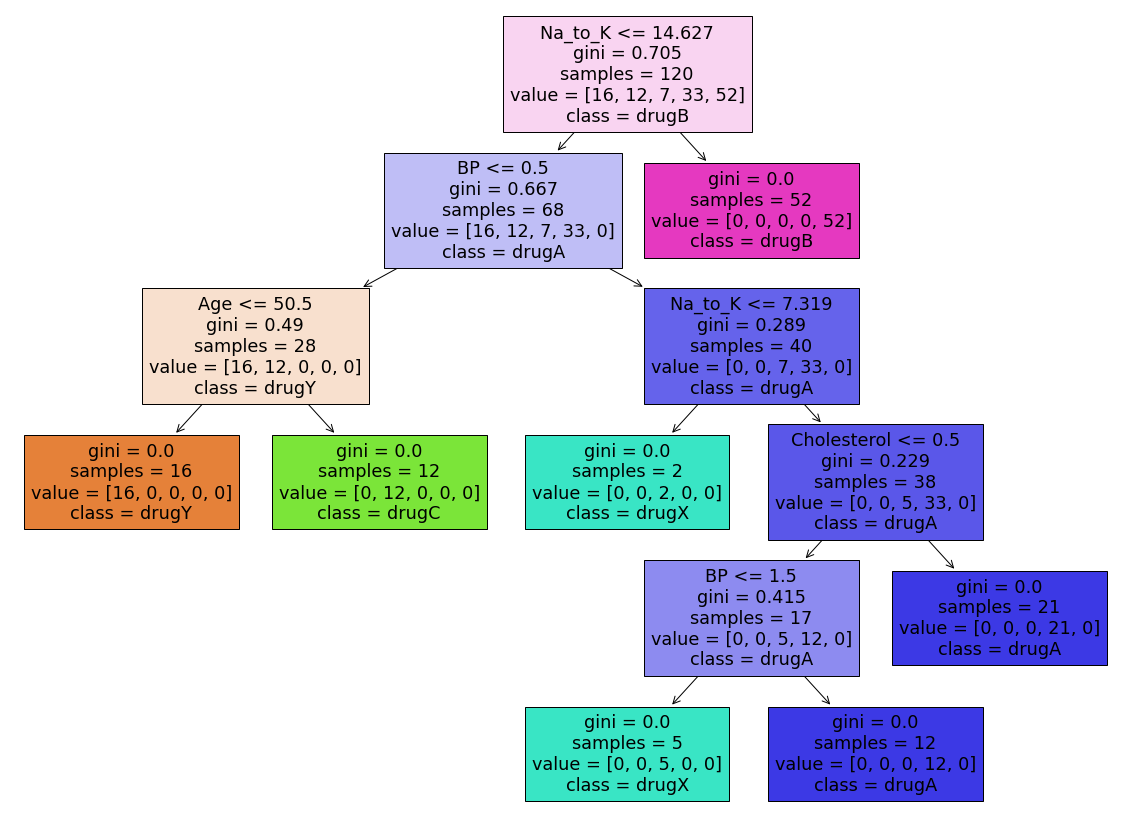

In [23]:
#Hyperparameters

# `min_impurity_decrease' - natija qanchalik "toza" bo'lishini belgilaydi. Standart qiymati 0
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.01)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)


plt.figure(figsize=(20,15))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()


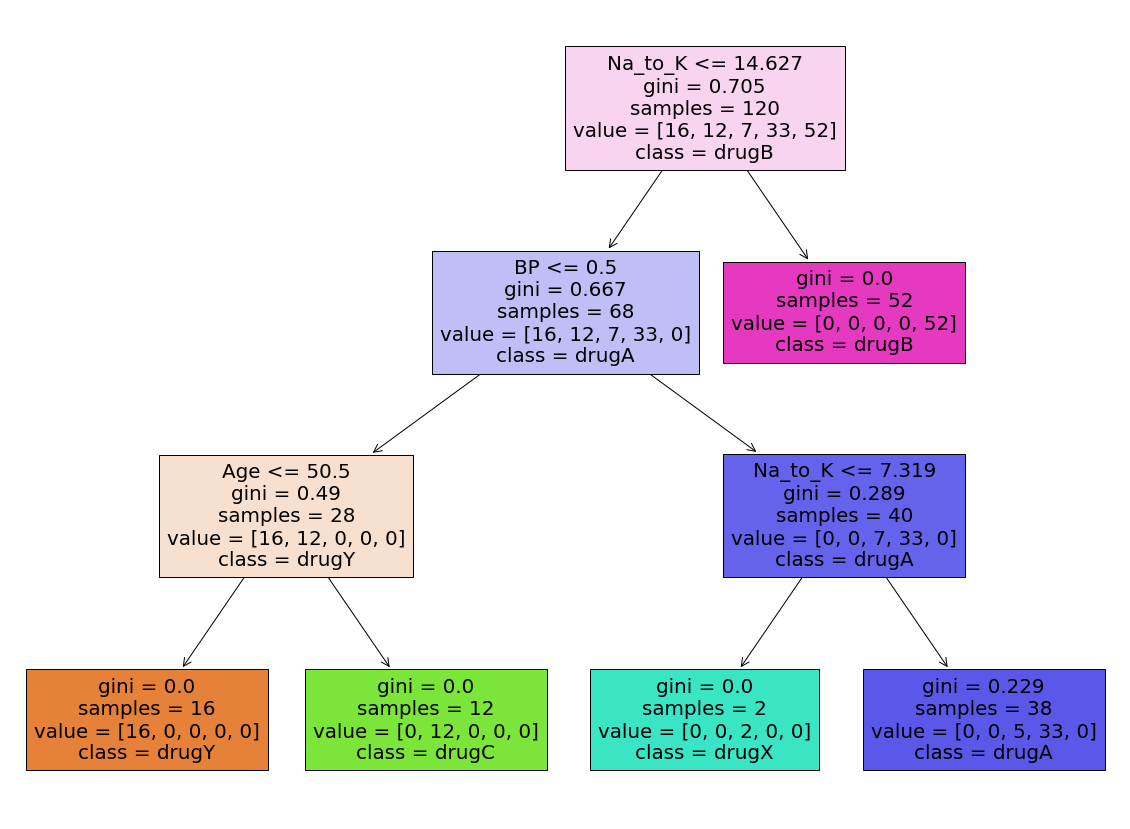

In [25]:
# max_depth - shajara qavatlari soni

tree_model = DecisionTreeClassifier(min_impurity_decrease=0.0, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
#print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(20,15))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

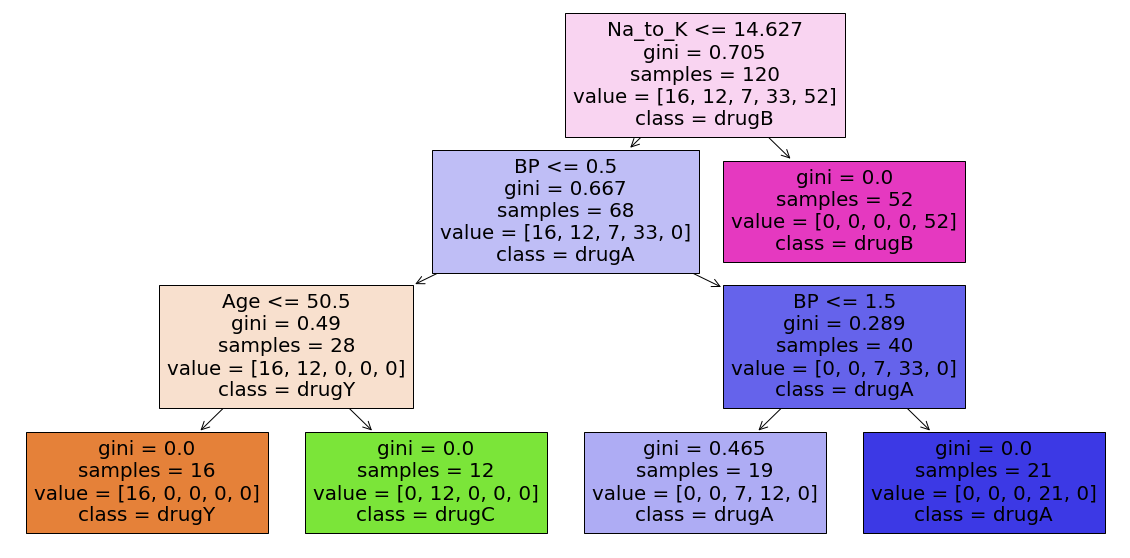

In [27]:
# min_samples_leaf - leaf node (yakuniy, barg tugun) hosil qilish uchun eng kam elementlar soni

tree_model = DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
#print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(20,10))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

In [28]:
# Random Forest

rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       1.00      0.78      0.88         9
       drugX       0.91      0.95      0.93        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.96        80
   macro avg       0.98      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80

